In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [100]:
filename = './data/Img13.jpg'

In [101]:
img = cv2.imread(filename, 0)

In [102]:
img_clr = cv2.cvtColor(cv2.imread(filename, 1), cv2.COLOR_BGR2RGB)

In [103]:
blur = cv2.GaussianBlur(img_clr,(9,9),3)

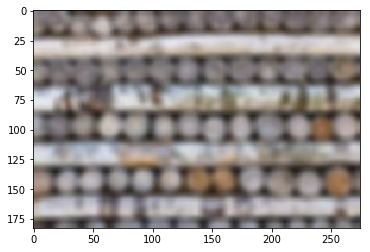

In [104]:
plt.imshow(blur)

In [105]:
hsv_img = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)
# hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2HSV)
# hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2HSV)

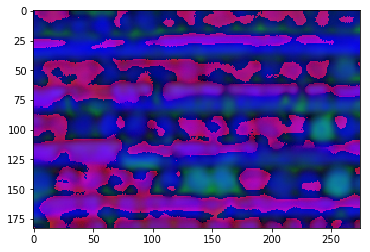

In [106]:
plt.imshow(hsv_img, cmap='hsv')

In [107]:
lower_shade = np.array([6,60,160])
upper_shade = np.array([20,255,255])

# lower_shade = np.array([6,60,160])
# upper_shade = np.array([20,255,255])


frame_threshed = cv2.inRange(hsv_img, lower_shade, upper_shade)

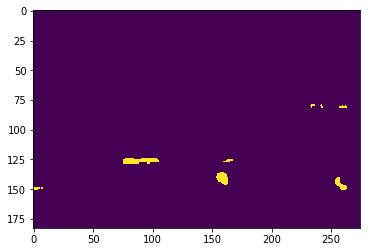

In [108]:
plt.imshow(frame_threshed)

In [109]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
mask_iterations = 10
frame_threshed_mask = frame_threshed
for i in range(0, mask_iterations):
    frame_threshed_mask = cv2.erode(frame_threshed_mask, element, iterations = 1)
#for i in range(0, mask_iterations):
    frame_threshed_mask = cv2.dilate(frame_threshed_mask, element, iterations = 1)
#frame_threshed_mask = cv2.erode(frame_threshed_mask, element)

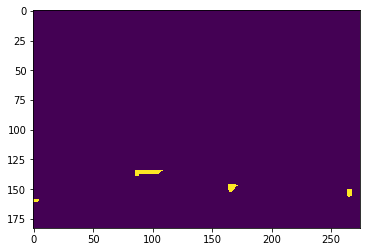

In [110]:
plt.imshow(frame_threshed_mask)

## Watershed

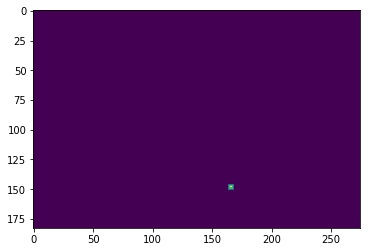

In [111]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(frame_threshed_mask,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
cv2.normalize(dist_transform, dist_transform, 0, 1, cv2.NORM_MINMAX)
plt.imshow(dist_transform)

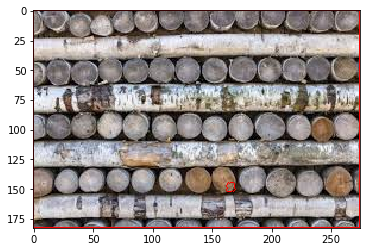

In [112]:
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img_clr,markers)
img_clr[markers == -1] = [255,0,0]

plt.imshow(img_clr)

In [113]:
np.unique(markers)

array([-1,  1,  2], dtype=int32)

In [114]:
from skimage.measure import regionprops, label
regions = regionprops(markers)

print('Number of tree logs (method 2):', len(regions) - 1)

Number of tree logs (method 2): 1


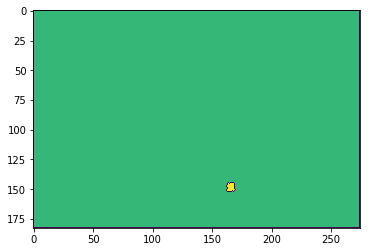

In [115]:
plt.imshow(markers)

In [116]:
#contour & convex hull

In [117]:
markers.shape

(183, 275)

In [118]:
ret3, markers_thres = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [119]:
markers_adap_thres = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 1)

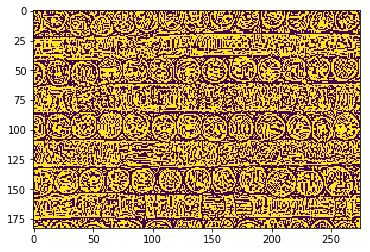

In [120]:
plt.imshow(markers_adap_thres)

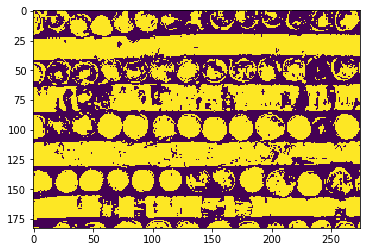

In [121]:
plt.imshow(markers_thres)

In [122]:
markers.astype('uint8')

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   1,   1, ...,   1,   1, 255],
       [255,   1,   1, ...,   1,   1, 255],
       ...,
       [255,   1,   1, ...,   1,   1, 255],
       [255,   1,   1, ...,   1,   1, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [123]:
a, b, c = cv2.findContours(markers_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [124]:
len(b)

620

In [125]:
all_convex_hull = []
for i in b:
    all_convex_hull.append(cv2.convexHull(i))

In [126]:
d = cv2.drawContours(img_clr, sorted(all_convex_hull, key=cv2.contourArea, reverse=True)[0:10], -1, (0, 0, 255), 8)

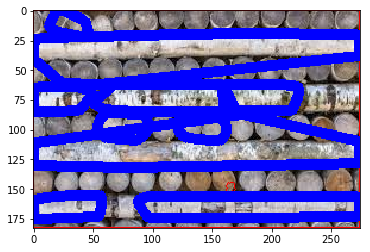

In [127]:
plt.imshow(d)

In [128]:
all_convex_hull

[array([[[ 34, 182]],
 
        [[ 33, 182]]], dtype=int32), array([[[  4, 182]],
 
        [[  0, 182]]], dtype=int32), array([[[125, 181]],
 
        [[124, 182]],
 
        [[123, 181]],
 
        [[124, 180]]], dtype=int32), array([[[ 97, 181]],
 
        [[ 96, 182]],
 
        [[ 95, 181]],
 
        [[ 96, 180]]], dtype=int32), array([[[269, 180]],
 
        [[268, 181]],
 
        [[267, 181]],
 
        [[266, 180]],
 
        [[267, 179]],
 
        [[268, 179]]], dtype=int32), array([[[263, 180]],
 
        [[262, 181]],
 
        [[261, 180]],
 
        [[262, 179]]], dtype=int32), array([[[249, 180]],
 
        [[247, 182]],
 
        [[246, 181]],
 
        [[246, 180]],
 
        [[247, 179]],
 
        [[248, 179]]], dtype=int32), array([[[126, 180]],
 
        [[125, 181]],
 
        [[124, 180]],
 
        [[125, 179]]], dtype=int32), array([[[ 98, 180]],
 
        [[ 97, 181]],
 
        [[ 96, 180]],
 
        [[ 97, 179]]], dtype=int32), array([[[ 36, 181]],
 
    

In [129]:
contour_area_list = []
for i in all_convex_hull:
    contour_area_list.append(cv2.contourArea(i))

sorted(contour_area_list, reverse=True)

[8636.0,
 8463.0,
 3229.5,
 2309.5,
 1226.0,
 1021.5,
 908.5,
 817.0,
 744.5,
 488.5,
 433.0,
 423.5,
 420.0,
 395.0,
 347.0,
 342.5,
 336.5,
 330.5,
 325.0,
 321.0,
 318.5,
 311.0,
 296.0,
 289.5,
 282.0,
 279.0,
 278.5,
 278.0,
 277.5,
 275.5,
 265.5,
 263.0,
 249.0,
 244.0,
 238.5,
 229.0,
 228.0,
 222.5,
 210.5,
 206.5,
 195.0,
 173.5,
 160.0,
 160.0,
 138.0,
 132.0,
 128.0,
 116.5,
 112.0,
 107.0,
 100.5,
 99.5,
 85.5,
 83.5,
 82.5,
 77.0,
 76.5,
 72.5,
 72.0,
 72.0,
 71.5,
 70.0,
 68.0,
 64.0,
 61.0,
 54.0,
 53.0,
 51.0,
 50.5,
 50.0,
 41.5,
 40.0,
 39.5,
 37.5,
 37.5,
 36.5,
 36.5,
 35.5,
 35.0,
 34.5,
 34.5,
 34.0,
 32.0,
 31.5,
 31.5,
 31.0,
 29.5,
 29.0,
 27.5,
 27.0,
 25.5,
 24.0,
 21.5,
 21.0,
 21.0,
 20.5,
 20.0,
 19.0,
 19.0,
 19.0,
 19.0,
 18.0,
 17.0,
 17.0,
 16.0,
 15.5,
 15.5,
 15.5,
 15.0,
 14.5,
 14.5,
 14.0,
 14.0,
 14.0,
 14.0,
 13.0,
 12.5,
 12.5,
 12.0,
 12.0,
 11.5,
 11.5,
 11.5,
 11.5,
 10.5,
 10.5,
 10.0,
 10.0,
 10.0,
 10.0,
 9.5,
 9.5,
 9.5,
 9.0,
 9.0,
 9.